In [1]:
import dsr
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as statdist

 # Detectability of Ground-Rupture at Paleoseismic sites
 
 
 Here let us try to reproduce the UCERF3 implementation (Appendix I)

In [2]:
mag = [7.0]


## Step 1:  What is probability that the event is (observable) surface-rupture event? 
I suppose - in actuality - this probability is not merely a function of magnitude. It could well depend on other factors such as location of hypocenter, dip of the fault, etc. However, magnitude-dependence works well for simplicity when factoring region-specific model.


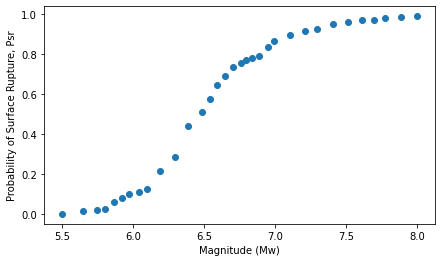

In [3]:
i = 0
prob_sr = dsr.prob_detectsurfrupture(mag[i], doplot=True)
plt.xlabel('Magnitude (Mw)');
plt.ylabel('Probability of Surface Rupture, Psr');
plt.rcParams.update({'font.size': 14})
fig = plt.gcf()
fig.set_size_inches(7, 4)

Figure 1. Probability of surface-rupture event





## Step 2. Get the average surface slip.

Personally, the linear model from UCERF3 does not augur well with my instincts. Whatever!




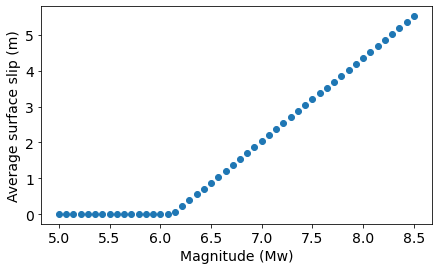

In [4]:
average_slip_surface = dsr.avg_surf_slip(mag[i])
mags = np.linspace(5,8.5, 50)
avs = []
for m in mags:
    avs.append(dsr.avg_surf_slip(m))

plt.plot(mags, avs, 'o')
plt.xlabel('Magnitude (Mw)');
plt.ylabel('Average surface slip (m)');
plt.rcParams.update({'font.size': 14})
fig = plt.gcf()
fig.set_size_inches(7, 4)

Figure 2. Relation between magniude and average surface slip from UCERf3 Appendix I. 


## Step 3. Get the slip profile.
This step distributes the average surface slip according to sinesqrt function.




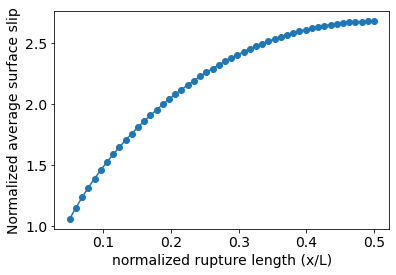

In [6]:
#  slip profile
x_by_RL = np.linspace(0.05, 0.5,50)
# slip at the point on the fault (x_by_RL) is distrbuted according to sinesqrt function
slip_x = dsr.sinesqrt(x_by_RL)*average_slip_surface


plt.rcParams.update({'font.size': 14})
plt.plot(x_by_RL, slip_x, 'o-')
plt.xlabel('normalized rupture length (x/L)');
plt.ylabel('Normalized average surface slip');
fig = plt.gcf()
fig.set_size_inches(6, 4)


Figure 3. Normalized slip profile along strike for Mw 7.0 event







## Step 4. Get distribution of normalized average slip at along-strike point on the fault-rupture

UCERF3 applies lognormal distribution, I'd prefer extreme value distribution. However, it remains to see how does that affect the results.

First, let us look at an example distribution



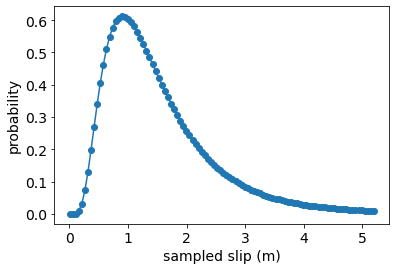

In [7]:
slp = 1.3
stddev = 0.6 # assumption .. there is not info, but figures to caliberate... yikes, no so doing that

nsampling = 100

dist=statdist.lognorm(s= stddev,scale=slp);
maxslp = 4*slp # four times mean is good? :o
sampledslp = np.linspace(0.001,maxslp,nsampling) 
sprob = dist.pdf(sampledslp)
plt.rcParams.update({'font.size': 14})
plt.plot(sampledslp, sprob, 'o-')
plt.xlabel('sampled slip (m)');
plt.ylabel('probability');
fig = plt.gcf()
fig.set_size_inches(6, 4)

Figure 4. An example depicting lognormal distribution of normalized average slip at a point along strike of fault-rupture






#### It might be useful to understand the implication of probability distribution function (PDF).

We consider PDF (thorugh summation, instead of more appropiate integration),
<br></br>
$P_{TD, total}$($u_{x}$) = $\sum_{i=1}^{n}$ $P_{tD}$($u_{x,i}$) $P_{x}$($u_{xi}$) &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(1)
<br></br>
which gives the probability of detecting slip ($u_{x}$) at the trench ( or detectability of paleo-slip) for surface-rupture event






## Step 5. Probabity of detecting paleo-slip at the trench

THe figure given below is what I refer to as "The Wrightwood model" (Table from UCERF Appendix I). UCERF3 employs linear interpolation on these data points as is in this workout. However, I believe an exponential model can be easily formulated which would just do fine.

We still have to consider the proability of being a surface-rupture event. Complete formulation is as follows:
<br></br>
$P_{paleoslip}$($u_{x}$) = $\sum_{i=1}^{n}$ $P_{tD}$($u_{x,i}$) $P_{x}$($u_{xi}$) $P_{SR}$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; (2)
<br></br>

which gives the detectability of ground-rupture at paleoseismic sites.





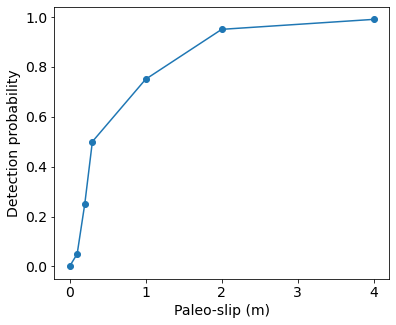

In [8]:
dsr.plot_prob_detect_paleoslip()
plt.rcParams.update({'font.size': 14})
plt.xlabel('Paleo-slip (m)');
plt.ylabel('Detection probability');
fig = plt.gcf()
fig.set_size_inches(6, 5)

Figure 5. The Wrightwood model for probabilty of detecting slip at paleoseismic site 





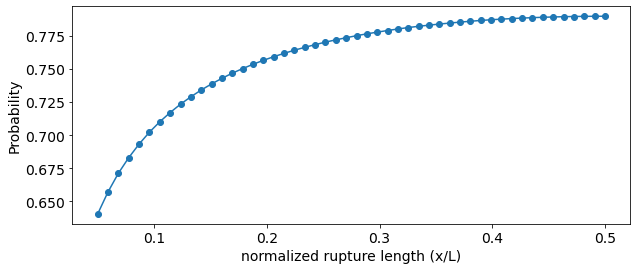

In [9]:
prob_paleo_detect = []

nsampling = 100
# I am assuming a constant stddev for an approximate shape
stddev = 0.6
    
# recall slip_x is slip profile
for slp in slip_x: 
    dist=statdist.lognorm(s= stddev,scale=slp);
    maxslp = 4*slp # four times mean is good? :o
    sampledslp = np.linspace(0.001,maxslp,nsampling) 
    sprob = dist.pdf(sampledslp)
    dx = (maxslp-0.001)/nsampling # 
    sampledprob = sprob*dx;
    
    prob_td_x = [] 
    for jj in range(len(sampledslp)):
        temp = dsr.prob_detect_paleoslip(sampledslp[jj])*sampledprob[jj]
        prob_td_x.append(temp)
    
    prob_td = sum(prob_td_x)
    prob_paleo_detect.append(prob_td*prob_sr)

plt.rcParams.update({'font.size': 14})
plt.plot(x_by_RL, prob_paleo_detect, 'o-')
plt.xlabel('normalized rupture length (x/L)');
plt.ylabel('Probability');
fig = plt.gcf()
fig.set_size_inches(10, 4)

Figure 6. Probability for detectability of ground-rupture at paleoseismic sites, for magnitude Mw 7.0 event